In [1]:

# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
#%matplotlib notebook
%matplotlib inline


#import matplotlib
#import matplotlib.animation as animation
from IPython.display import clear_output
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gpasdnn.kernels import *


In [107]:
#simulation 1d (for time series modelling and forecasting)

In [29]:

n=500
x =np.linspace(-8,8,n)
kernels = [RBF(),Matern52(),Matern32(),Matern12(),Linear(),Periodic(period=2)]
kernels

[Instance of class 'RBF',
 Instance of class 'Matern52',
 Instance of class 'Matern32',
 Instance of class 'Matern12',
 Instance of class 'Linear',
 Instance of class 'Periodic']

In [30]:
y_list =[]

for ker in kernels:
    gp_1d = ker
    y = gp_1d.simulate(x)
    y_list.append(y)
    



In [31]:
    
fig, ax = plt.subplots(2,3,sharex =True, figsize=(12,5))
fig.suptitle("Gaussian Process 1d simulation") # 
k=0
for i in range(2):
    for j in range(3):
        ax[i,j].plot(x,y_list[k],'b')
        ax[i,j].set_title(kernels[k].label())
        k+=1


In [35]:
fig, ax = plt.subplots(2,3,sharex =True, figsize=(12,5))
fig.suptitle("Gaussian Process 1d simulation") # 
k=0
y_list_noise = []
for i in range(2):
    for j in range(3):
        iid= .3*np.random.randn(x.size)
        y_list_noise.append(y_list[k] + .5*iid)
        ax[i,j].plot(x,y_list_noise[k],'ko')
        ax[i,j].plot(x,y_list[k],'b',lw=2)
        ax[i,j].set_title(kernels[k].label())
        k+=1

In [47]:
Y_list =[]
x = np.linspace(-5,5,300)
kernels = [RBF(),Matern32(),Matern12(),Matern52(),Periodic(period=3),Linear()]

for ker in kernels:
    gp_2d = ker
    y = gp_2d.simulate2d(x)
    Y_list.append(y)
    

    


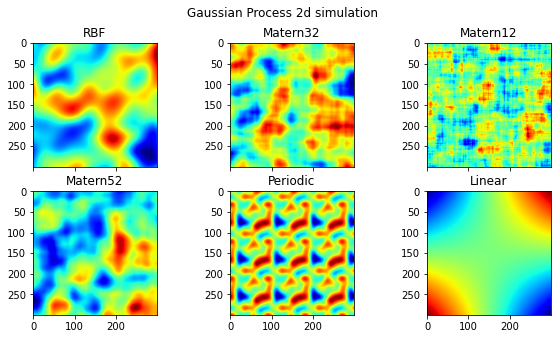

In [48]:
fig, ax = plt.subplots(2,3,sharex =True, figsize=(10,5))
fig.suptitle("Gaussian Process 2d simulation") # 
k=0
for i in range(2):
    for j in range(3):
        ax[i,j].imshow(Y_list[k], cmap ="jet")
        ax[i,j].set_title(kernels[k].label())
        k+=1



In [52]:
x = np.linspace(-3,3,300)


Y = RBF(length_scale=.6,variance=3).simulate3d(x)
print(Y.shape)

(300, 300, 300)


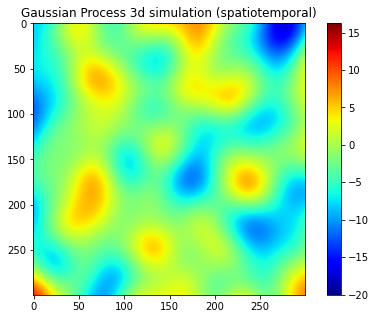

In [53]:

from IPython.display import clear_output

for i in range(Y.shape[2]):
    clear_output(wait=True)
    fig = plt.figure(figsize=(8,5) )
    plt.imshow(Y[:,:,i],cmap ="jet",vmin=Y.min(),vmax=Y.max())
    plt.title("Gaussian Process 3d simulation (spatiotemporal)")
    plt.colorbar()
    plt.show() 
    time.sleep(0.01)